In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
np.random.seed(1338)
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm
n_splits = 4

n_points = 100

fig_X = np.random.randn(100, 10)

percentiles_classes = [.1, .3, .6]
fig_y = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])
fig_groups = np.hstack([[ii] * 10 for ii in range(10)])


def plot_cv_indices(cv, X, y, groups=None, ax=None, lw=20):
    """Create a sample plot for indices of a cross-validation object."""
    
    n_splits = cv.n_splits

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=groups)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(range(len(indices)), [ii + .5] * len(indices),
                   c=indices, marker='_', lw=lw, cmap=cmap_cv,
                   vmin=-.2, vmax=1.2)

    # Plot the data classes and groups at the end
    ax.scatter(range(len(X)), [ii + 1.5] * len(X),
               c=y, marker='_', lw=lw, cmap=cmap_data)
    
    
    yticklabels = list(f"Iteration {i}" for i in range(n_splits)) + ['class']
    if groups is not None:
        ax.scatter(range(len(X)), [ii + 2.5] * len(X), c=groups, marker='_', lw=lw, cmap=cmap_data)
        yticklabels.append('group')
        yticks=np.arange(n_splits + 2) + .5
        ylim_upper = n_splits + 2.2
    else:
        yticks=np.arange(n_splits + 1) + .5
        ylim_upper = n_splits + 1.2
    
    ax.set(title=f'{cv.__class__.__name__} $k={cv.n_splits}$',
           yticks=yticks, yticklabels=yticklabels,
           xticks=[],
           xlabel='Sample index', ylim=[ylim_upper, -.2], xlim=[0, 100])
    


# 交叉验证（Cross-Validation）

## k折交叉验证(k-fold cross validation)

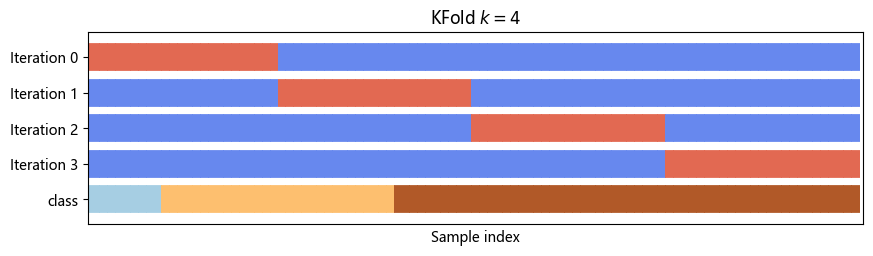

In [11]:
n_splits=4

from sklearn.model_selection import KFold
cv = KFold(n_splits=4)

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=100)
ax.set_title(f'KFold $k={n_splits}$');
plot_cv_indices(cv, fig_X, fig_y,ax=ax)

In [14]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
logreg = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)

In [4]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=4)
scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

print("       Cross-validation scores: ", np.round(scores, 3))
print(f"Average cross-validation score:  {scores.mean() :.2f}")

       Cross-validation scores:  [1.    0.684 0.838 0.378]
Average cross-validation score:  0.73


In [9]:
from sklearn.model_selection import cross_val_score, KFold

kfold = KFold(n_splits=4)
scores = cross_val_score(logreg, iris.data, iris.target, scoring="f1_macro", cv=kfold)

print("       Cross-validation scores: ", np.round(scores, 3))
print(f"Average cross-validation score:  {scores.mean() :.2f}")

       Cross-validation scores:  [1.    0.653 0.913 0.431]
Average cross-validation score:  0.75


In [15]:
from sklearn.model_selection import KFold, cross_val_score

kfold = KFold(n_splits=5, shuffle=True) # 打乱样本排列顺序

scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)

print(f"Cross-validation scores:\n {np.round(scores, 2)}")

Cross-validation scores:
 [0.93 0.97 1.   0.97 0.93]


# 1.2. 分层$k$折交叉验证（stratified k-fold ）

保证各类别数据在训练集和测试集保持相同的分布

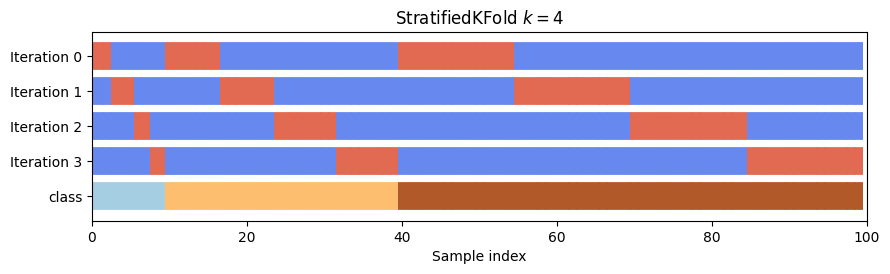

In [7]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=4)

fig, ax = plt.subplots(figsize=(10, 2.5), dpi=100)
ax.set_title(f'StratifiedKFold $k={n_splits}$');
plot_cv_indices(cv, fig_X, fig_y, n_splits=4, ax=ax)

In [5]:
from sklearn.model_selection import cross_val_score, KFold


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
print("Iris labels:\n{}".format(iris.target))

Iris labels:
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(f"Cross-validation scores: {np.round(scores, 2)}")

Cross-validation scores: [0.87 0.97 0.93 0.93 1.  ]


D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281

In [25]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=5)

scores = cross_val_score(logreg, iris.data, iris.target, cv=kfold)
print(f"Cross-validation scores: {np.round(scores, 2)}")

Cross-validation scores: [0.97 1.   0.93 0.97 1.  ]


对二分类问题，`cross_val_score`的`cv`参数可是设置整数，等效设置`StratifiedKFold`的`n_split`

In [26]:
scores = cross_val_score(logreg, iris.data, iris.target, cv=5)
print(f"Cross-validation scores: {np.round(scores, 2)}")

Cross-validation scores: [0.97 1.   0.93 0.97 1.  ]


## 1.3. 按组折叠交叉验证

同组内的样本必须在同一个迭代内。

在人脸识别情感中，检验对未知人脸情感的识别，因此，需要保证在数据中某人的人脸数据不能交叉存在于训练集和测试集中。

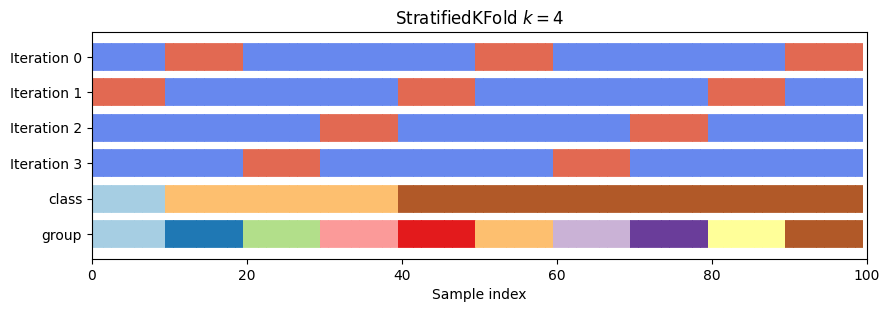

In [11]:
from sklearn.model_selection import GroupKFold


cv = GroupKFold(n_splits=4)

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)
ax.set_title(f'GroupKFold $k={n_splits}$');
plot_cv_indices(cv, fig_X, fig_y, groups=fig_groups, n_splits=4, ax=ax)

In [12]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import GroupKFold

X, y = make_blobs(n_samples=12, random_state=0)

groups = [0, 0, 0, 1, 1, 1, 1, 2, 2, 3, 3, 3]
scores = cross_val_score(logreg, X, y, groups=groups, cv=GroupKFold(n_splits=3))
print("Cross-validation scores:\n{}".format(np.round(scores, 2)))

Cross-validation scores:
[0.75 0.6  0.67]


# 2. 打乱划分(Shuffle-split)交叉验证

In [43]:
from sklearn.model_selection import ShuffleSplit, StratifiedShuffleSplit

cv1 = ShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

cv2 = StratifiedShuffleSplit(n_splits=8, test_size=0.2, random_state=42)

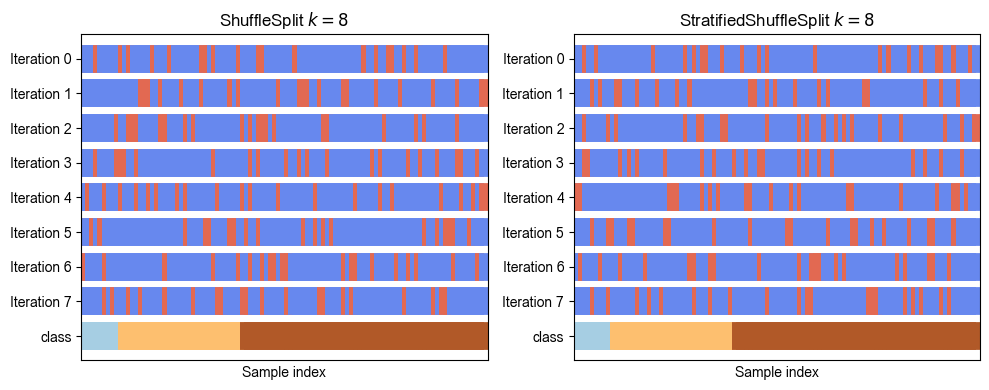

In [41]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4), dpi=100)
ax = axes[0]
plot_cv_indices(cv1, fig_X, fig_y, groups=None, ax=ax)

ax = axes[1]
plot_cv_indices(cv2, fig_X, fig_y, groups=None, ax=ax)
plt.tight_layout()

In [28]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=20)

scores = cross_val_score(logreg, iris.data, iris.target, cv=shuffle_split)

print(f"Cross-validation scores:\n{np.round(scores, 2)}")

print(f"Cross-validation scores:\n{np.round(scores.mean(), 2)}")

Cross-validation scores:
[0.95 0.93 0.93 0.95 0.96 0.96 0.97 0.97 0.99 0.99 0.95 0.96 0.91 0.95
 0.95 0.96 0.97 0.95 0.93 0.96]
Cross-validation scores:
0.95


In [30]:
from sklearn.model_selection import ShuffleSplit

shuffle_split = ShuffleSplit(test_size=.5, train_size=.5, n_splits=20)

scores = cross_val_score(logreg, iris.data, iris.target, scoring="f1_macro", cv=shuffle_split)

print(f"Cross-validation scores:\n{np.round(scores, 2)}")

print(f"Cross-validation scores:\n{np.round(scores.mean(), 2)}")

Cross-validation scores:
[0.99 0.96 0.97 0.96 0.99 0.99 0.95 0.95 0.96 0.96 0.97 0.97 0.92 0.95
 0.99 0.94 0.95 0.97 0.97 0.97]
Cross-validation scores:
0.96


```
```

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit

shuffle_split = StratifiedShuffleSplit(test_size=.5, train_size=.5, n_splits=20)

scores = cross_val_score(logreg, iris.data, iris.target, scoring="f1_macro", cv=shuffle_split)

print(f"Cross-validation scores:\n{np.round(scores, 2)}")

print(f"Cross-validation scores:\n{np.round(scores.mean(), 2)}")

Cross-validation scores:
[0.96 0.97 0.99 0.93 0.97 0.95 0.96 0.97 0.96 0.97 0.96 0.99 0.96 0.99
 0.97 0.99 0.95 0.97 0.97 0.99]
Cross-validation scores:
0.97


## 2.2 打乱按组划分交叉验证

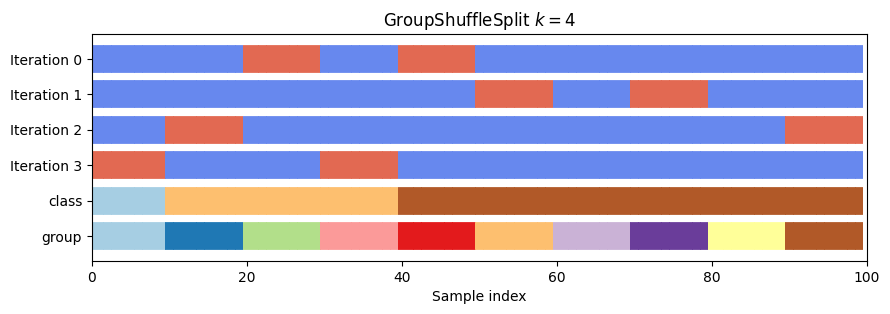

In [16]:
from sklearn.model_selection import GroupShuffleSplit
cv = GroupShuffleSplit(n_splits=4, random_state=2020)

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)
ax.set_title(f'GroupShuffleSplit $k={n_splits}$');
plot_cv_indices(cv, fig_X, fig_y, groups=fig_groups, n_splits=4, ax=ax)

## 3. 时间序列交叉验证

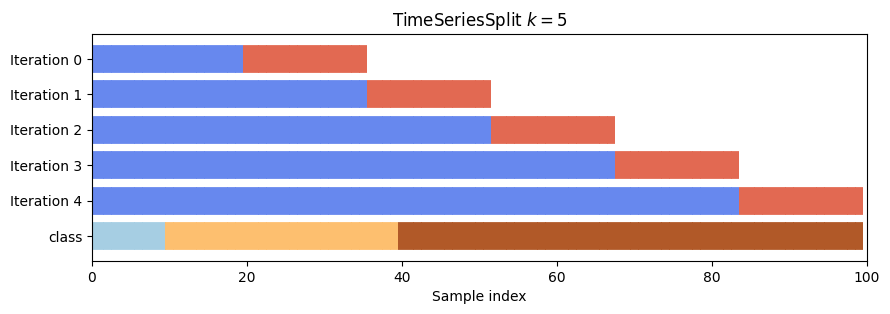

In [17]:
from sklearn.model_selection import TimeSeriesSplit
cv = TimeSeriesSplit(n_splits=5)

fig, ax = plt.subplots(figsize=(10, 3), dpi=100)
ax.set_title(f'TimeSeriesSplit $k={5}$');
plot_cv_indices(cv, fig_X, fig_y, n_splits=5, ax=ax)

# 实例：IRIS数据集

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X, y = iris.data, iris.target

In [34]:
X.shape

(150, 4)

In [16]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281

training scores:  [0.9407 0.9556 0.9407 0.9556 0.9481 0.9481 0.9556 0.9481 0.9481 0.9481]
 testing scores:  [0.9333 0.8667 1.     0.9333 0.9333 0.9333 0.8667 0.9333 1.     1.    ]


D:\TGBAWork\.tgba_platform\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1281: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


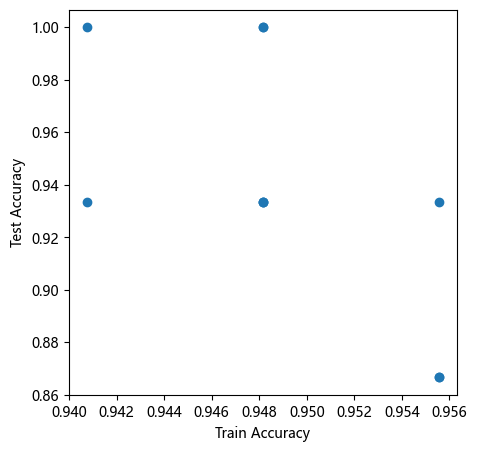

In [10]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)

train_scores, test_scores = [],[]

cv = StratifiedKFold(n_splits=10) # 分层k折
for train, test in cv.split(X, y):
    model.fit(X[train,:], y[train])

    train_scores.append(accuracy_score(y[train], model.predict(X[train])))
    test_scores.append(accuracy_score(y[test], model.predict(X[test])))

print("training scores: ", np.array(train_scores).round(4))
print(" testing scores: ", np.array(test_scores).round(4))

plt.figure(figsize=(5,5))
plt.scatter(train_scores, test_scores)
plt.gca().set(xlabel="Train Accuracy", ylabel="Test Accuracy")
plt.show()

<br />

上面的程序，可以直接使用[`cross_validate`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)函数简化实现。

In [40]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate

model = LogisticRegression(multi_class='ovr', solver='lbfgs', max_iter=1000)

cv = StratifiedShuffleSplit(n_splits=20, test_size=0.25, random_state=42)

cv_results = cross_validate(model, X, y, cv=cv, scoring=['accuracy', "f1_macro"], 
                            return_train_score=True, return_estimator=True)

In [41]:
cv_results

{'fit_time': array([0.08600473, 0.07700443, 0.03700209, 0.06400347, 0.04400229,
        0.05200291, 0.04300237, 0.03700185, 0.06000352, 0.04000211,
        0.04900265, 0.04700255, 0.05100298, 0.05300307, 0.04700303,
        0.04200244, 0.05200291, 0.05600333, 0.05100298, 0.04000235]),
 'score_time': array([0.00200009, 0.00300002, 0.00200033, 0.00200009, 0.00200009,
        0.00200009, 0.00200057, 0.0030005 , 0.00199986, 0.00200009,
        0.00200009, 0.00200009, 0.00199986, 0.00200009, 0.00300002,
        0.00200009, 0.0030005 , 0.00500011, 0.00200009, 0.00300002]),
 'estimator': [LogisticRegression(max_iter=1000, multi_class='ovr'),
  LogisticRegression(max_iter=1000, multi_class='ovr'),
  LogisticRegression(max_iter=1000, multi_class='ovr'),
  LogisticRegression(max_iter=1000, multi_class='ovr'),
  LogisticRegression(max_iter=1000, multi_class='ovr'),
  LogisticRegression(max_iter=1000, multi_class='ovr'),
  LogisticRegression(max_iter=1000, multi_class='ovr'),
  LogisticRegression(

In [25]:
print(np.array(cv_results["train_accuracy"]).round(4))
print(np.array(cv_results["test_accuracy"]).round(4))

print(np.array(cv_results["train_f1_macro"]).round(4))
print(np.array(cv_results["test_f1_macro"]).round(4))

[0.9643 0.9554 0.9554 0.9375 0.9554 0.9554 0.9464 0.9643 0.9554 0.9464
 0.9464 0.9375 0.9554 0.9554 0.9464 0.9643 0.9375 0.9464 0.9464 0.9554]
[0.8947 0.9474 0.9211 0.9737 0.9211 0.9474 1.     0.8421 0.9474 0.9737
 0.8947 0.9737 0.8947 0.9211 0.9474 0.8947 0.9737 0.9737 0.9737 0.9474]
[0.9639 0.9556 0.9554 0.9369 0.9556 0.9556 0.9459 0.9644 0.9555 0.9466
 0.9459 0.9368 0.9549 0.9554 0.9467 0.9644 0.9376 0.9459 0.9464 0.9549]
[0.8968 0.9459 0.92   0.9743 0.9179 0.9459 1.     0.8377 0.9466 0.9733
 0.8949 0.9743 0.8968 0.92   0.9459 0.8889 0.9733 0.9743 0.9732 0.9484]


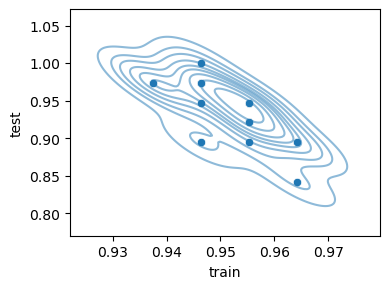

In [29]:
import seaborn as sns
import pandas as pd

metrics_df = data=pd.DataFrame({"train": cv_results["train_accuracy"], "test":cv_results["test_accuracy"] })

plt.figure(figsize=(4, 3), dpi=100)
ax = plt.gca()
sns.kdeplot(x="train", y="test", data=metrics_df, alpha=0.5, ax=ax)
sns.scatterplot(x="train", y="test", data=metrics_df, ax=ax)
plt.show()

# 4. 留一(Leave-one-out)法交叉验证

每折留出$p$个作为测试，其它作为训练，称之为Leave-$p$-out。

如果选出$p$，那么验证的数量$\binom {n}{p}$个，数量太多，很少采用$p>1$的时候。

因此，一般选择$p=1$时。

In [18]:
from sklearn.model_selection import LeaveOneOut
loo = LeaveOneOut()

scores = cross_val_score(logreg, iris.data, iris.target, cv=loo)

In [33]:
scores

array([0.95998399, 0.9732906 , 0.98666133, 0.93309247, 0.9732906 ,
       0.9465812 , 0.95998399, 0.9732906 , 0.95998399, 0.9732906 ,
       0.95985548, 0.98666133, 0.95998399, 0.98666133, 0.9732906 ,
       0.98666133, 0.9465812 , 0.9732906 , 0.9732906 , 0.98666133])

In [34]:
scores.mean()

0.9686193578760394

data shape: (150, 4)
Number of cv iterations:  150
Mean accuracy: 0.97


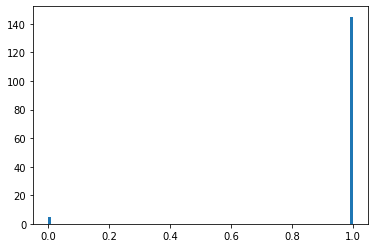

In [20]:
print('data shape:', iris.data.shape)
print(f"Number of cv iterations: ", len(scores))
print(f"Mean accuracy: {scores.mean():.2f}")

plt.hist(scores, bins=100);

# 5. 模型训练过程

例如，SVM，有linear核和rbf核可选，线性对应一个参数`C`，rbf核对应着有`C`和`gamma`两个参数，如何选择哪种核，核的参数选择什么值？这是我们不得不面对的问题。

<TABLE>
    <TR style="background-color: #fff">
        <TD>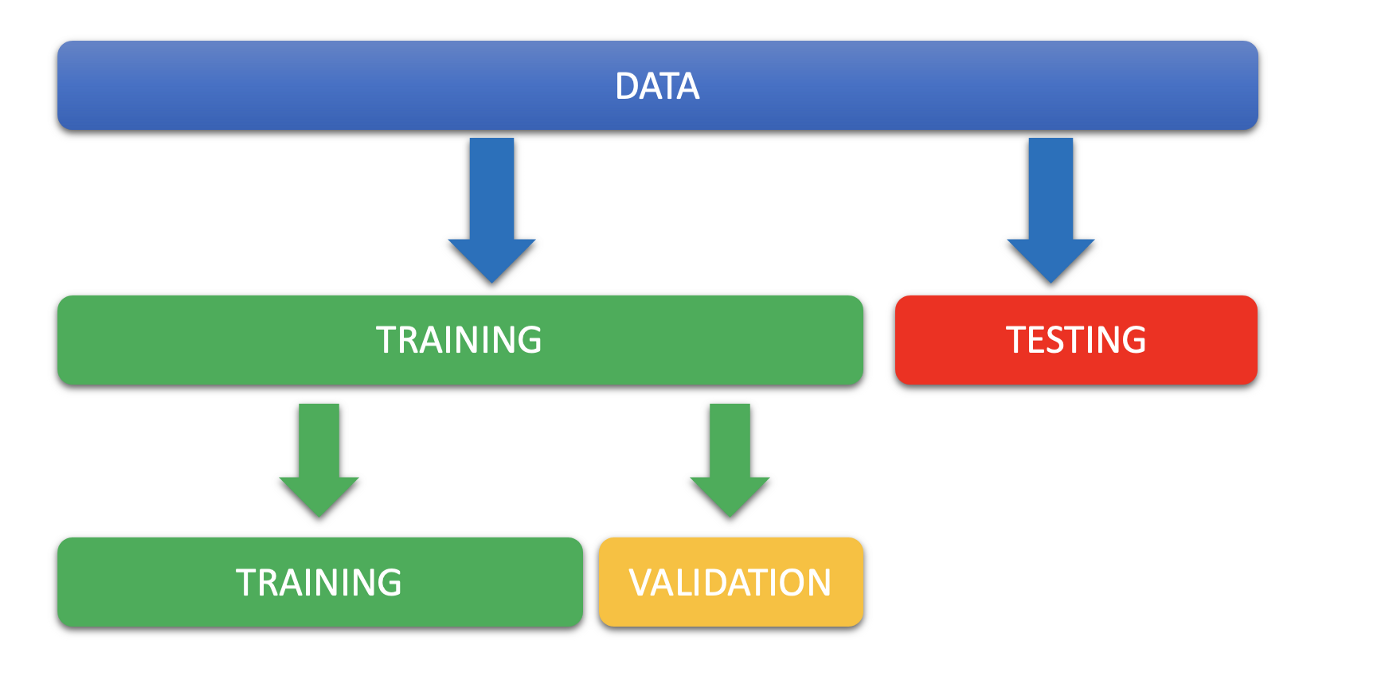</TD>
        <TD style="width:60%">
            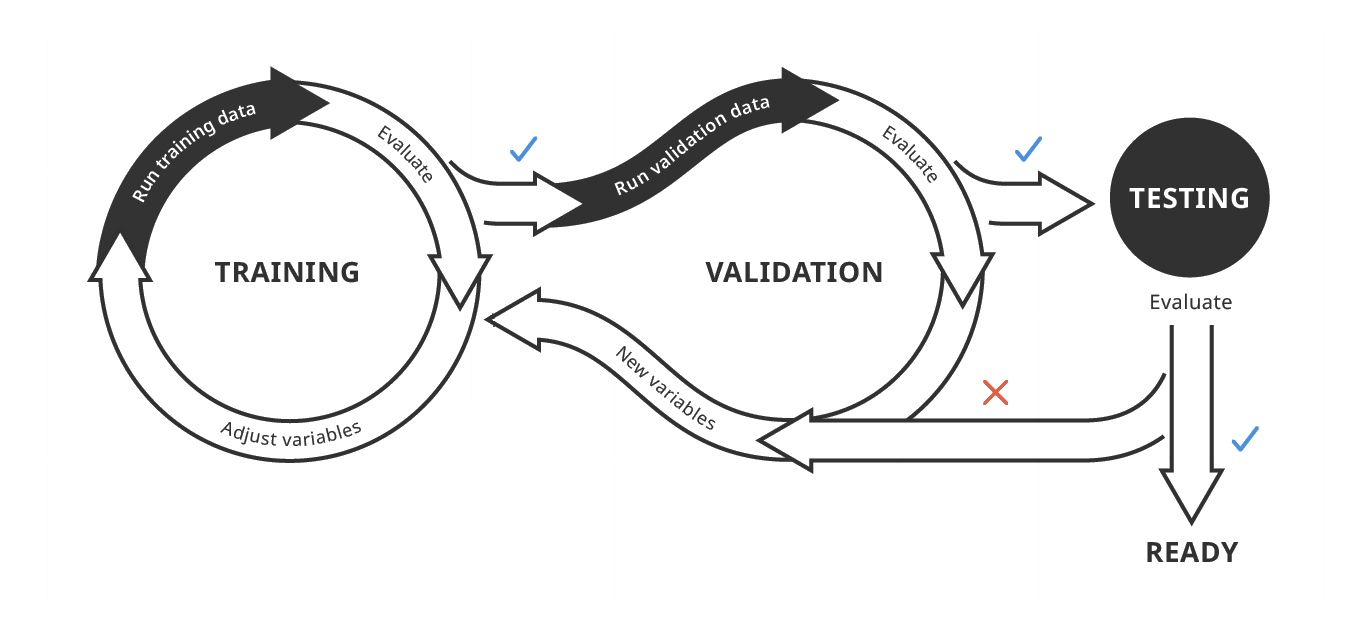
        </TD>
    </TR>
</TABLE>

由于需要选择一套最优的参数，需要借助除训练集数据之外的数据进行验证，但这也应不同于最后评估模型的数据，
因此，有必要把数据分为三份：
1. 训练(training set)及
2. 验证集(validation set)
3. 测试集(test set)。

## 网格穷举法

穷举候选参数的各种组合

In [16]:
import sklearn.datasets
from sklearn.model_selection import train_test_split

digits = sklearn.datasets.load_digits()

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=0)

In [9]:
pd.Series(y).value_counts()

3    183
1    182
5    182
4    181
6    181
9    180
7    179
0    178
2    177
8    174
Name: count, dtype: int64

In [13]:
X_train.shape

(898, 64)

#### （2）使用交叉验证寻找最好参数



手写数字识别，对Recall和Precision都很关注，为了平衡选择F1值作为模型选择的目标值，又因为该分类是个多类问题，选择“宏平均”方法，获得各分类效果的平均F1。


训练集有$898$数据，不妨划分为$8$分，每份大约有$112$条样本，在交叉验证中，期中一份作为验证集(Validation Set)，有一定的代表性，为了避免数据样本集中，随机打乱样本排列顺序。

In [17]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [19]:
%%time

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold


kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=42)

grid = GridSearchCV(
    SVC(), param_grid, scoring='f1_macro', cv=kfold, n_jobs=4
)

grid.fit(X_train, y_train)

CPU times: total: 78.1 ms
Wall time: 938 ms


,estimator,SVC()
,param_grid,"[{'C': [1, 10, ...], 'kernel': ['linear']}, {'C': [1, 10, ...], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}]"
,scoring,'f1_macro'
,n_jobs,4
,refit,True
,cv,StratifiedKFo... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


参数`n_jobs`设置并行任务，在上面例子中，当前计算任务分成4个并行的任务，这样可以有效的利用计算机的CPU资源。由于任务是密集型计算，一般情况下，并行任务数小于等于CPU的核数或者超线程数。当`n_jobs=-1`则自动利用全部CPU核或超线程。

In [20]:
grid.cv_results_

{'mean_fit_time': array([0.032368  , 0.01422572, 0.01402599, 0.02777916, 0.03244296,
        0.01382518, 0.02650061, 0.02495772, 0.04405019, 0.01445565,
        0.03687018, 0.02716786]),
 'std_fit_time': array([0.0149527 , 0.00052182, 0.00157764, 0.01973008, 0.02827235,
        0.00384575, 0.01335693, 0.01995399, 0.03688023, 0.01036314,
        0.03708413, 0.02938699]),
 'mean_score_time': array([0.00576714, 0.00443661, 0.00411916, 0.00719023, 0.01444364,
        0.00673136, 0.02371544, 0.01617989, 0.01217997, 0.00994226,
        0.00690299, 0.00715911]),
 'std_score_time': array([0.00099273, 0.00099117, 0.0012227 , 0.00660547, 0.01169087,
        0.00179592, 0.03039941, 0.01940826, 0.01252582, 0.01401617,
        0.00263055, 0.00613104]),
 'param_C': masked_array(data=[1, 10, 100, 1000, 1, 1, 10, 10, 100, 100, 1000, 1000],
              mask=[False, False, False, False, False, False, False, False,
                    False, False, False, False],
        fill_value=999999),
 'param_ker

In [40]:
grid.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_C', 'param_kernel', 'param_gamma', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])

In [25]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
parmas = grid.cv_results_['params']
for mean, std, params in zip(means, stds, parmas):
    print(f"score: {mean:0.3f} (±{std:0.3f}) for {params}")

print()
    
best_score = grid.best_score_
best_params = grid.best_params_
print(f"Best score: {best_score:.3f} for {best_params}")


score: 0.972 (±0.017) for {'C': 1, 'kernel': 'linear'}
score: 0.972 (±0.017) for {'C': 10, 'kernel': 'linear'}
score: 0.972 (±0.017) for {'C': 100, 'kernel': 'linear'}
score: 0.972 (±0.017) for {'C': 1000, 'kernel': 'linear'}
score: 0.981 (±0.007) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.958 (±0.016) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
score: 0.981 (±0.008) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.978 (±0.013) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
score: 0.981 (±0.008) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.982 (±0.011) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
score: 0.981 (±0.008) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.982 (±0.011) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

Best score: 0.982 for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}


In [26]:
for i, name in enumerate(grid.cv_results_.keys()):
    print(f"{name:18s}", end= '\n' if (i +1) % 4 ==0 else ' ')

mean_fit_time      std_fit_time       mean_score_time    std_score_time    
param_C            param_kernel       param_gamma        params            
split0_test_score  split1_test_score  split2_test_score  split3_test_score 
split4_test_score  split5_test_score  split6_test_score  split7_test_score 
mean_test_score    std_test_score     rank_test_score    

#### （3） 最后用测试集评估模型性能

In [22]:
from sklearn.metrics import classification_report

print(classification_report(y_test, grid.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.96      1.00      0.98        91
           2       1.00      1.00      1.00        88
           3       0.99      0.97      0.98        92
           4       0.99      1.00      0.99        91
           5       0.99      0.99      0.99        91
           6       0.99      0.98      0.98        91
           7       1.00      1.00      1.00        89
           8       0.99      0.95      0.97        87
           9       0.97      0.98      0.97        90

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



In [23]:
d = {"a":100}

def f(a):
    print(f"a={a}")

f(a=100)

a=100


In [24]:
f(**d)

a=100


In [28]:
m1 = SVC(**grid.cv_results_['params'][-3])
m1.fit(X_train, y_train)

print(classification_report(y_test, m1.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        89
           1       0.96      1.00      0.98        91
           2       1.00      1.00      1.00        88
           3       0.99      0.97      0.98        92
           4       0.99      1.00      0.99        91
           5       0.99      0.99      0.99        91
           6       0.99      0.98      0.98        91
           7       1.00      1.00      1.00        89
           8       0.99      0.95      0.97        87
           9       0.97      0.98      0.97        90

    accuracy                           0.99       899
   macro avg       0.99      0.99      0.99       899
weighted avg       0.99      0.99      0.99       899



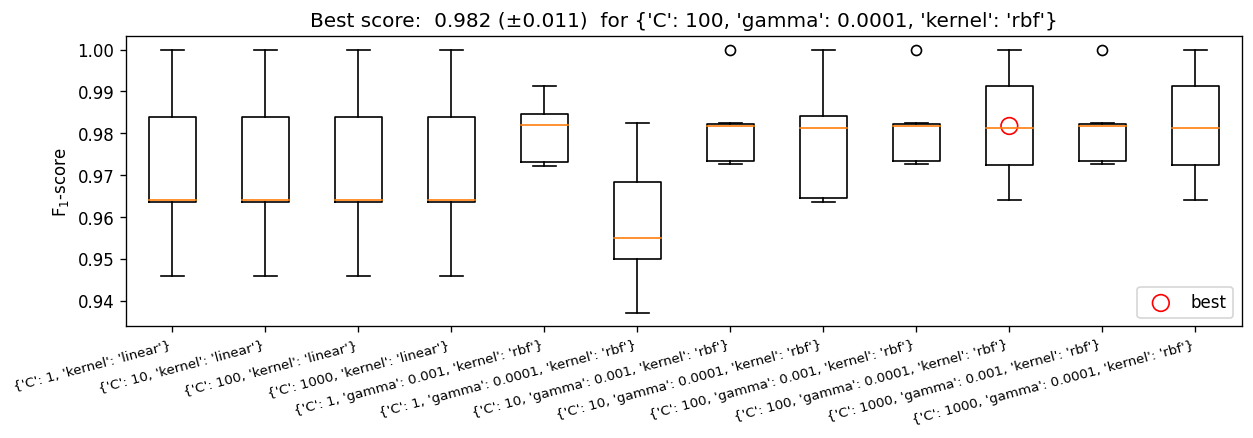

In [28]:
data = np.vstack([grid.cv_results_[f"split{i}_test_score"] for i in range(grid.n_splits_)])

plt.figure(figsize=(12, 3.2), dpi=120)
plt.boxplot(data)
plt.scatter(grid.best_index_ +1, grid.best_score_, ec="red", c="none", s=100, label="best")
params = grid.cv_results_["params"]
plt.xticks(range(1, len(params) + 1), params, 
           rotation=15, horizontalalignment='right', fontsize=8)
plt.ylabel("$\mathrm{F}_1$-score")

mean_score = grid.cv_results_["mean_test_score"][grid.best_index_]
std_score = grid.cv_results_["std_test_score"][grid.best_index_]

plt.title(f"Best score: {mean_score: 0.3f} (±{std_score:0.3f})  for {grid.best_params_}")
plt.legend(loc=4);

In [32]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate


model = SVC(**grid.cv_results_['params'][-3])


cv = StratifiedShuffleSplit(n_splits=10, test_size=0.25, random_state=42)

cv_results = cross_validate(model, X, y, cv=cv, scoring=['f1_macro', "precision_macro"], 
                            return_train_score=True, return_estimator=True)
cv_results

{'fit_time': array([0.09150839, 0.03669   , 0.01248717, 0.01238942, 0.01298022,
        0.01378226, 0.01313567, 0.01412225, 0.04679751, 0.02696538]),
 'score_time': array([0.03006411, 0.01628113, 0.01280808, 0.01390934, 0.0148387 ,
        0.01341724, 0.01480103, 0.01287055, 0.02262139, 0.03424978]),
 'estimator': [SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001),
  SVC(C=100, gamma=0.0001)],
 'test_f1_macro': array([0.98892262, 0.98227752, 0.99115746, 0.98429294, 0.98871377,
        0.97307196, 0.99774826, 0.98884962, 0.98213915, 0.99557227]),
 'train_f1_macro': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_precision_macro': array([0.98931545, 0.98273743, 0.99115722, 0.9846966 , 0.98909274,
        0.97464868, 0.99787234, 0.98935386, 0.98292656, 0.99583333]),
 'train_precision_m

In [26]:
%%time

param_grid = {
    'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']
}

kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)

grid = GridSearchCV(
    SVC(), param_grid, scoring='f1_macro', cv=kfold, n_jobs=4
)

grid.fit(X_train, y_train)

CPU times: total: 141 ms
Wall time: 4.2 s


GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='f1_macro')

In [30]:
%%time

param_grid = {
    'C': [0.01, 0.1, 1], 'gamma': [0.001, 0.0005, 0.0001], 'kernel': ['rbf']
}

kfold = StratifiedKFold(n_splits=8, shuffle=True, random_state=0)

grid = GridSearchCV(
    SVC(), param_grid, scoring='f1_macro', cv=kfold, n_jobs=4
)

grid.fit(X_train, y_train)

CPU times: total: 46.9 ms
Wall time: 2.37 s


GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [0.01, 0.1, 1], 'gamma': [0.001, 0.0005, 0.0001],
                         'kernel': ['rbf']},
             scoring='f1_macro')

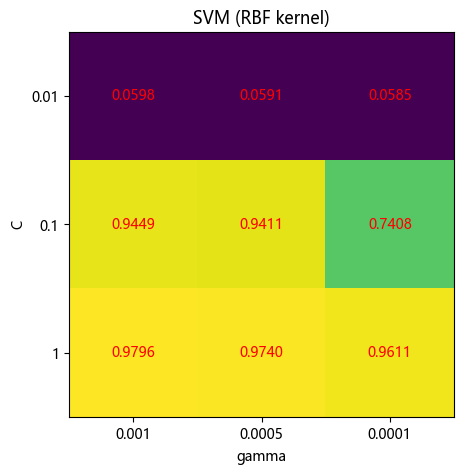

In [31]:
plt.figure(figsize=(5, 5),dpi=100)
ax = plt.gca()

parmas_C = grid.param_grid["C"]
parmas_gamma = grid.param_grid["gamma"]

scores = grid.cv_results_["mean_test_score"].reshape(len(parmas_C), len(parmas_gamma))
ax.imshow(scores)

ax.set_yticks(np.arange(len(parmas_C)))
ax.set_xticks(np.arange(len(parmas_gamma)))
ax.set_yticklabels(parmas_C)
ax.set_xticklabels(parmas_gamma)
ax.set_xlabel("gamma")
ax.set_ylabel("C")
ax.set_title("SVM (RBF kernel)")

for i in range(len(parmas_gamma)):
    for j in range(len(parmas_C)):
        ax.text(i, j, f"{scores[j, i]:0.4f}", ha="center", va="center", color="red")

#### 嵌套交叉验证

除了选择参数时使用交叉验证，在测试时也可以采用交叉验证。

在下面例子`C`有$4$个候选值，`gamma`也有$4$个候选值，参数网格共有$4\times4=16$种组合，在参数选择时采用$8$折的交叉验证，在测试阶段采用$5$折的交叉验证，因此，在整个计算过程中，大约要拟合$16 \times 8 \times 5 = 640$个模型。显然，这种倍乘模型计算时间代价相当高。

CPU times: total: 0 ns
Wall time: 62.5 μs


In [33]:
%%time

from sklearn.model_selection import cross_validate

param_grid = {
    'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']
}

kfold = StratifiedKFold(n_splits=8)

grid = GridSearchCV(
    SVC(), param_grid, scoring='f1_macro', cv=kfold, n_jobs=4
)

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(grid, X, y, scoring="f1_macro", cv=kfold, 
                              n_jobs=4, return_train_score=True, return_estimator=True)

CPU times: total: 31.2 ms
Wall time: 8.04 s


In [41]:
grid.best_params_

{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}

In [32]:
print(scores["train_score"])
print(scores["test_score"])

[1. 1. 1. 1. 1.]
[0.99166349 0.99448196 0.9944825  0.99170038 0.98598359]


In [56]:
%%time

from sklearn.model_selection import cross_validate

param_grid = {
    'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001, 0.0001, 0.00001], 'kernel': ['rbf']
}

kfold = StratifiedKFold(n_splits=8)

grid = GridSearchCV(
    SVC(), param_grid, scoring='f1_macro', cv=kfold, n_jobs=4
)

X = digits.data
y = digits.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=1)

grid.fit(X_train, y_train)

CPU times: total: 93.8 ms
Wall time: 2.69 s


GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=None, shuffle=False),
             estimator=SVC(), n_jobs=4,
             param_grid={'C': [1, 10, 100, 1000],
                         'gamma': [0.01, 0.001, 0.0001, 1e-05],
                         'kernel': ['rbf']},
             scoring='f1_macro')

In [57]:
means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
parmas = grid.cv_results_['params']
for mean, std, params in zip(means, stds, parmas):
    print(f"score: {mean:0.3f} (±{std:0.3f}) for {params}")

print()
    
best_score = grid.best_score_
best_params = grid.best_params_
print(f"Best score: {best_score:.3f} for {best_params}")


score: 0.835 (±0.050) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
score: 0.990 (±0.005) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.967 (±0.011) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
score: 0.771 (±0.053) for {'C': 1, 'gamma': 1e-05, 'kernel': 'rbf'}
score: 0.841 (±0.046) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
score: 0.990 (±0.005) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.987 (±0.008) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
score: 0.964 (±0.014) for {'C': 10, 'gamma': 1e-05, 'kernel': 'rbf'}
score: 0.841 (±0.046) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
score: 0.990 (±0.005) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.984 (±0.006) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
score: 0.976 (±0.009) for {'C': 100, 'gamma': 1e-05, 'kernel': 'rbf'}
score: 0.841 (±0.046) for {'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
score: 0.990 (±0.005) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
score: 0.984 (±0.006) for {'C':

In [53]:
m1 = SVC(**grid.cv_results_["params"][10])

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(m1, X, y, scoring="f1_macro", cv=kfold, 
                              n_jobs=4, return_train_score=True, return_estimator=True)

In [54]:
scores["test_score"].mean(), scores["test_score"].std(ddof=1)

(np.float64(0.9842985823115953), np.float64(0.005472869952373497))

In [55]:
scores["train_score"].mean(), scores["train_score"].std(ddof=1)

(np.float64(1.0), np.float64(0.0))

In [ ]:

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_validate(grid, X, y, scoring="f1_macro", cv=kfold, 
                              n_jobs=4, return_train_score=True, return_estimator=True)